# **PROPENSITY MODEL**

# 1. Importing and Data Warehousing 

# Importing Necessary Packages

In [1]:
# General
import pandas as pd
import os
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

# Data Manipulation and PreProcessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

#Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Importing Data (Part 1)
df1 = pd.read_csv('Part2 - Data1.csv')

# Printing first 5 rows of the data
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
# Dataset shape
df1.shape
# There are 5000 rows and 8 columns in our dataset

(5000, 8)

In [4]:
# Importing dataset (Part 2)
df2=pd.read_csv('Part2 -Data2.csv')

# Printing first 5 rows
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [5]:
# Dataset shape
df2.shape
# There are 5000 rows and 8 columns in our dataset

(5000, 7)

# Merging the dataset

In [6]:
# Merging the dataset on ID column
df = df1.merge(df2,left_on='ID',right_on='ID')

# Printing dataset
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [7]:
# Dataset shape
df.shape
# Combined dataframe has 14 columns (since ID is common in both datasets) and 5000 rows

(5000, 14)

# 2. Data Cleansing

In [8]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [9]:
# Checking datatypes of all columns in the dataset
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [10]:
# Changing datatypes of categorical features
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

df.dtypes
# We can see all categorical columns datatypes are changed

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [11]:
# Checking Null values in the dataset
df.isnull().sum()

# Target variable Loanoncard having few missing records

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [12]:
# Treating the missing values 
# LoanOnCard has 20 missing values so we drop them.
df.dropna(axis=0,inplace=True)

In [13]:
# Checking null values again.
df.isnull().sum()

# All the missing records of LoanOnCard column are dropped.

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [14]:
df.drop('ID',axis=1,inplace=True)

# 3.Data Analysis & Visulaization

In [15]:
# Data Description
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


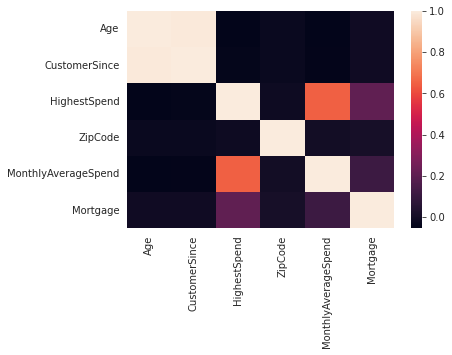

In [16]:
fig = sns.heatmap(data = df.corr())

In [17]:
# Mortgage column has outliers as the largest value and mean are differing by large values.
# Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist**

# Univariate Analysis

**Age**

<AxesSubplot:title={'center':'Boxplot for Age column'}, xlabel='Age'>

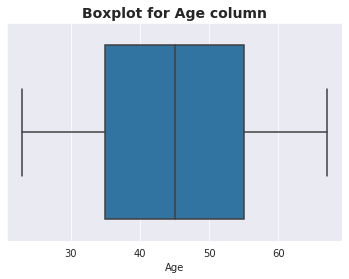

In [18]:
# Outlier Analysis for Age Column
plt = sns.boxplot(x='Age', data=df)
plt.set_title('Boxplot for Age column', fontsize= 14, fontweight='bold')
plt

In [19]:
# Checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('Total Number of outliers in Age:',len(Outliers))

Total Number of outliers in Age: 0


<AxesSubplot:title={'center':'Distribution for Age column'}, xlabel='Age', ylabel='Density'>

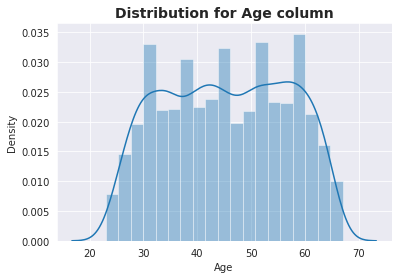

In [20]:
# Distribution of Age column
plt = sns.distplot(df['Age'])
plt.set_title('Distribution for Age column', fontsize= 14, fontweight='bold')
plt

**Conclusions:**
*   No outliers in this column.
*   There is normality maintained in age column.
*   People with age between 35 to 65 are more.

**CustomerSince**

<AxesSubplot:title={'center':'Boxplot for CustomerSince column'}, xlabel='CustomerSince'>

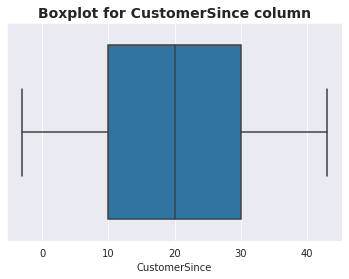

In [21]:
# Outlier Analysis for CustomerSince Column
plt = sns.boxplot(x='CustomerSince', data=df)
plt.set_title('Boxplot for CustomerSince column', fontsize= 14, fontweight='bold')
plt

In [22]:
# checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('Total Number of outliers in CustomerSince:',len(Outliers))

Total Number of outliers in CustomerSince: 0


<AxesSubplot:title={'center':'Distribution for CustomerSince column'}, xlabel='CustomerSince', ylabel='Density'>

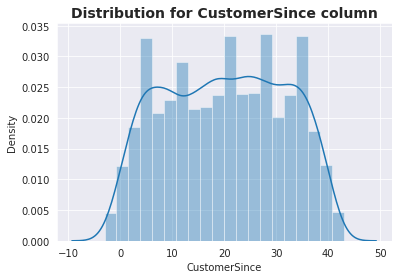

In [23]:
# Distribution of CustomerSince column
plt = sns.distplot(df['CustomerSince'])
plt.set_title('Distribution for CustomerSince column', fontsize= 14, fontweight='bold')
plt


**Conclusions:**

*   No outliers
*   There are more customers since 10 to 30.

**HighestSpend**

<AxesSubplot:title={'center':'Boxplot for HighestSpend column'}, xlabel='HighestSpend'>

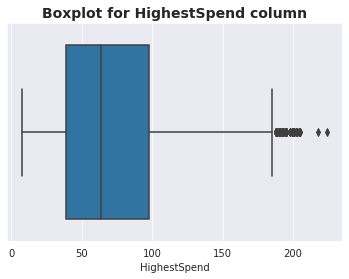

In [24]:
# Outlier Analysis for HighestSpend Column
plt = sns.boxplot(x='HighestSpend', data=df)
plt.set_title('Boxplot for HighestSpend column', fontsize= 14, fontweight='bold')
plt

<AxesSubplot:title={'center':'Distribution for HighestSpend column'}, xlabel='HighestSpend', ylabel='Density'>

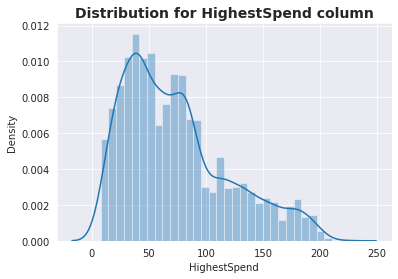

In [25]:
# Distribution of HighestSpend column
plt = sns.distplot(df['HighestSpend'])
plt.set_title('Distribution for HighestSpend column', fontsize= 14, fontweight='bold')
plt

**Conclusion**


*  96 Outliers, some spendings are more than 200.
*  Positively skewed.
*  In one transaction highest spend amount is between 45 to 100






**MonthlyAverageSpend**

<AxesSubplot:title={'center':'Boxplot for MonthlyAverageSpend column'}, xlabel='MonthlyAverageSpend'>

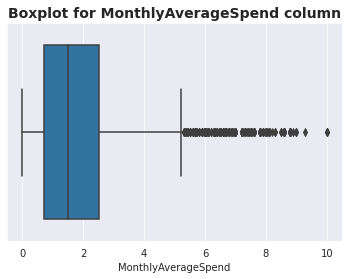

In [26]:
# Outlier Analysis for MonthlyAverageSpend Column
plt = sns.boxplot(x='MonthlyAverageSpend', data=df)
plt.set_title('Boxplot for MonthlyAverageSpend column', fontsize= 14, fontweight='bold')
plt

In [27]:
# checking count of outliers.
q25,q75=np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MonthlyAverageSpend'] if i < lower or i > upper]
print('Total Number of outliers in MonthlyAverageSpend:',len(Outliers))

Total Number of outliers in MonthlyAverageSpend: 324


<AxesSubplot:title={'center':'Distribution for MonthlyAverageSpend column'}, xlabel='MonthlyAverageSpend', ylabel='Density'>

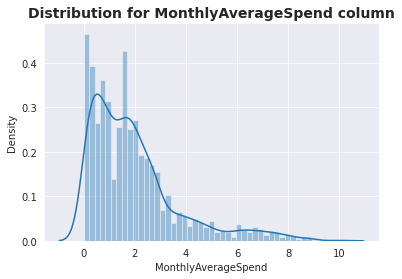

In [28]:
# Distribution of MonthlyAverageSpend column
plt = sns.distplot(df['MonthlyAverageSpend'])
plt.set_title('Distribution for MonthlyAverageSpend column', fontsize= 14, fontweight='bold')
plt


**Conclusions:**


*   Positively skewed.
*   324 outliers, so customers spent huge amount.
*   Monthly average spend of the customer are mostly between 1 to 3




**ZipCode**

<AxesSubplot:title={'center':'Boxplot for ZipCode column'}, xlabel='ZipCode'>

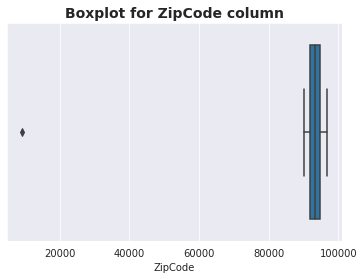

In [29]:
# Outlier Analysis for ZipCode Column
plt = sns.boxplot(x='ZipCode', data=df)
plt.set_title('Boxplot for ZipCode column', fontsize= 14, fontweight='bold')
plt

In [30]:
# checking count of outliers.
q25,q75=np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['ZipCode'] if i < lower or i > upper]
print('Total Number of outliers in ZipCode:',len(Outliers))

Total Number of outliers in ZipCode: 1


<AxesSubplot:title={'center':'Distribution for ZipCode column'}, xlabel='ZipCode', ylabel='Density'>

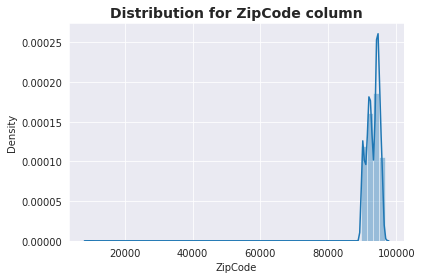

In [31]:
# Distribution of ZipCode column
plt = sns.distplot(df['ZipCode'])
plt.set_title('Distribution for ZipCode column', fontsize= 14, fontweight='bold')
plt



**Conclusions**
*   No proper distribution



**Mortgage** 

<AxesSubplot:title={'center':'Boxplot for Mortgage column'}, xlabel='Mortgage'>

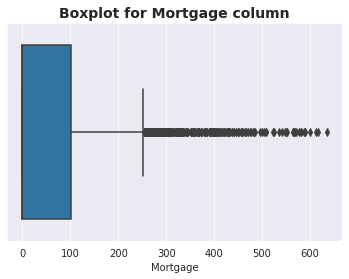

In [32]:
# Outlier Analysis for Mortgage Column
plt = sns.boxplot(x='Mortgage', data=df)
plt.set_title('Boxplot for Mortgage column', fontsize= 14, fontweight='bold')
plt

In [33]:
# checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('Total Number of outliers in Mortgage:',len(Outliers))

Total Number of outliers in Mortgage: 291


<AxesSubplot:title={'center':'Distribution for Mortgage column'}, xlabel='Mortgage', ylabel='Density'>

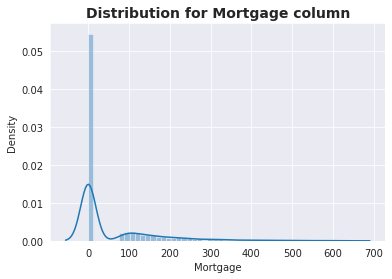

In [34]:
# Distribution of Mortgage column
plt = sns.distplot(df['Mortgage'])
plt.set_title('Distribution for Mortgage column', fontsize= 14, fontweight='bold')
plt

> **Conclusions:** 

*   No proper distribution.

**Distribution of categorical variables**

In [35]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

**HiddenScore**

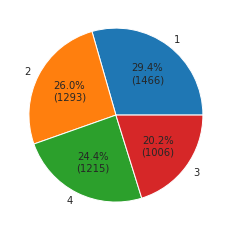

In [36]:
# Distribution of Hidden Score Column
import matplotlib.pyplot as plt
s = df['HiddenScore'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

**Conclusions:**
*   Equally distributed






**Level**

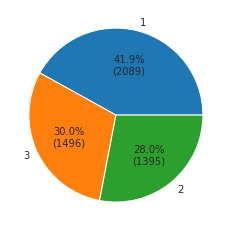

In [37]:
# Distribution of Level Column
s = df['Level'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

> **Conclusions:**

*   Distributions of level 1 is more and 2 and 3 are equal.



**FixedDepositAccount**

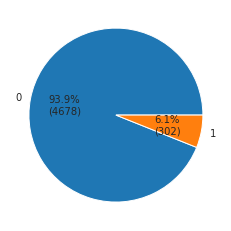

In [38]:
# Distribution of FixedDepositAccount Column
s = df['FixedDepositAccount'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

> **Conclusions:**

*   93.9% of customers does not have fixed deposit account.

**InternetBanking**

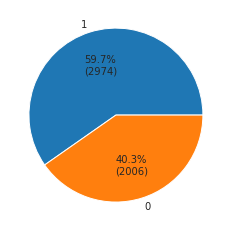

In [39]:
# Distribution of InternetBanking Column
s = df['InternetBanking'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

> **Conclusions:**

*   60 % of people uses internet banking




**CreditCard**

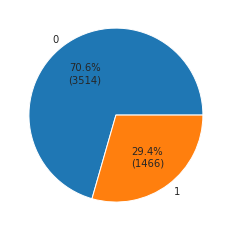

In [40]:
# Distribution of CreditCard Column
s = df['CreditCard'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

> **Conclusions:**

*   70 % of people uses bank's credit card





**LoanOnCard**

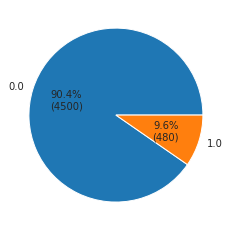

In [41]:
# Distribution of LoanOnCard Column
s = df['LoanOnCard'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

> **Conlusions:**

*   90% of people do not have loan on credit card




 # **Bi Variate Analysis**

**Numerical vs Category**

**LoanOnCard vs CustomerSince**

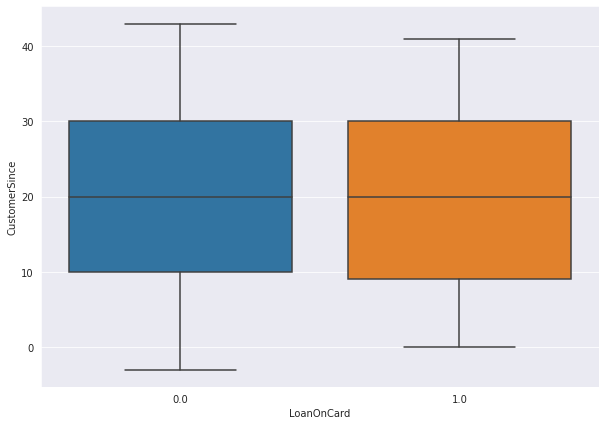

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

> **Conclusions**

*   Customer of the bank since has equal distribution on loan holders and non-loan holders.




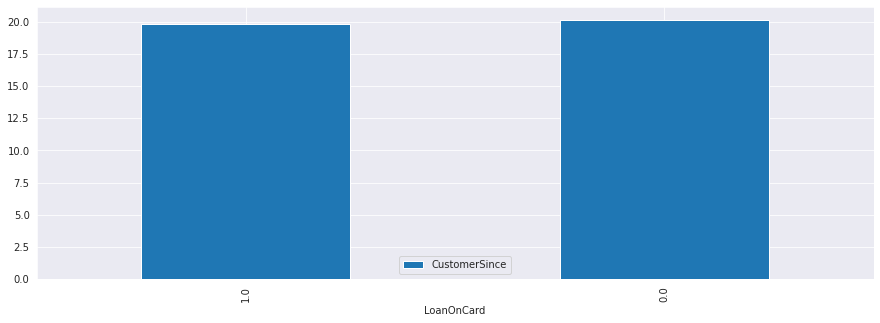

In [43]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

**HighestSpend vs LoanOnCard**

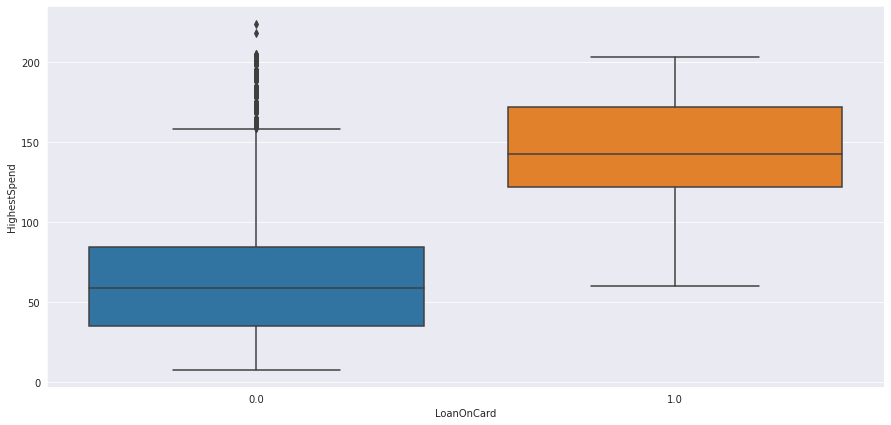

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df)
plt.show()

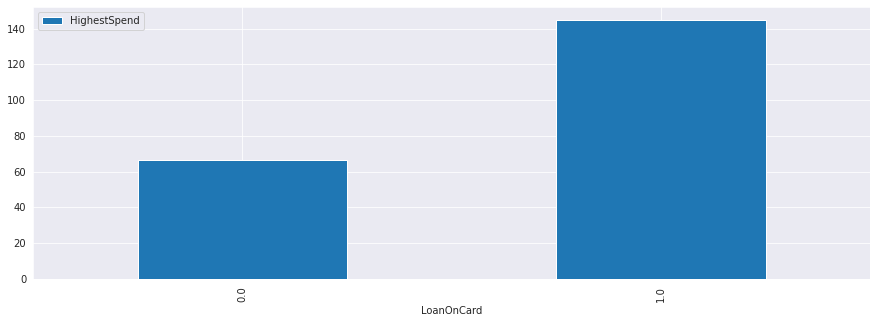

In [45]:
df.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

**MonthlyAverageSpend vs LoanOnCard**


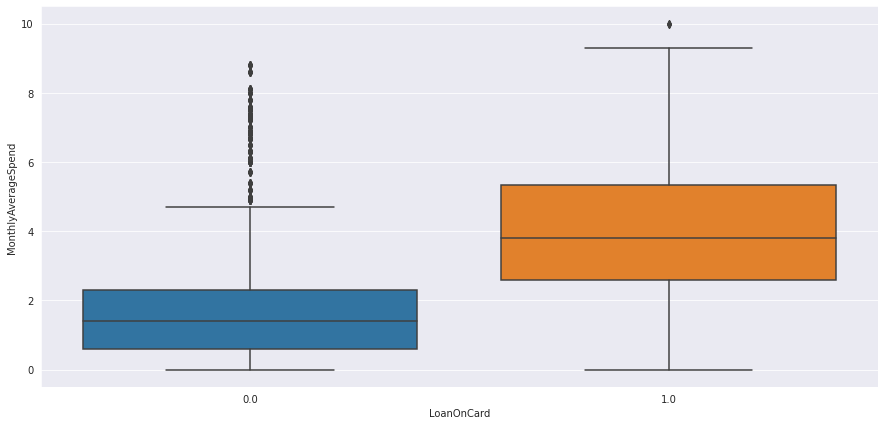

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df)
plt.show()

> **Conclusions:**

*   Directly proportional to highest spend
*   Monthly average spend is more for loan holders


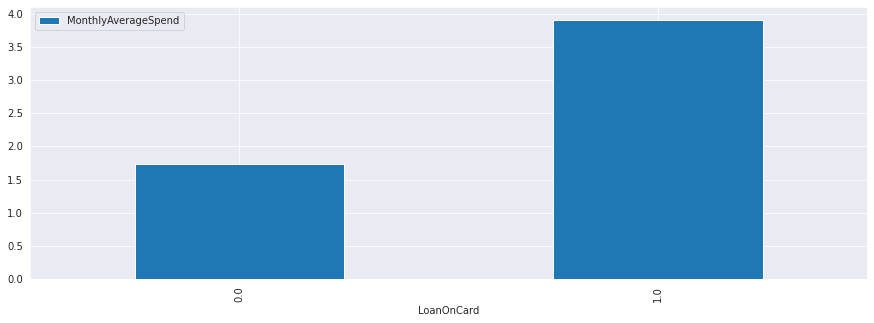

In [47]:
df.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

**Mortgage vs LoanOnCard**

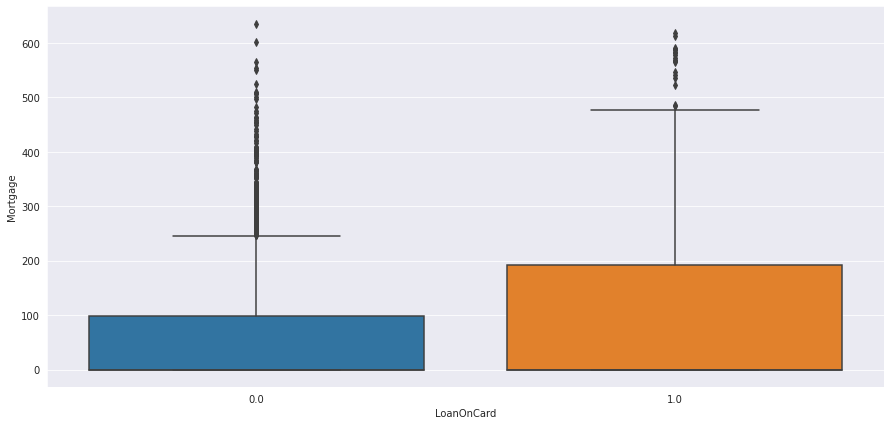

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

> **Conclusions:**

*   Extreme values seen
*   Mortage value is high for loan holders


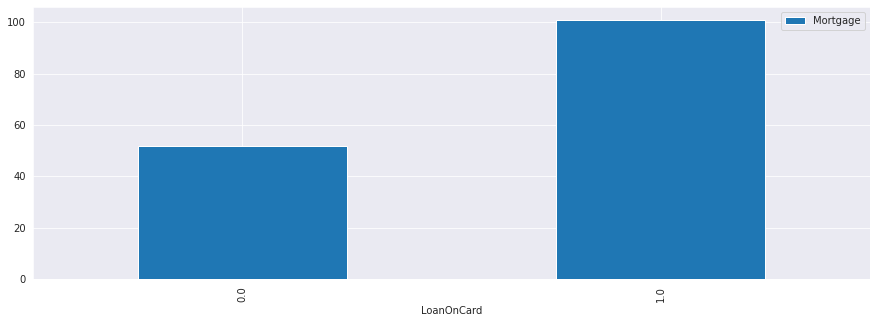

In [49]:
df.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

**Age vs LoanOnCard**

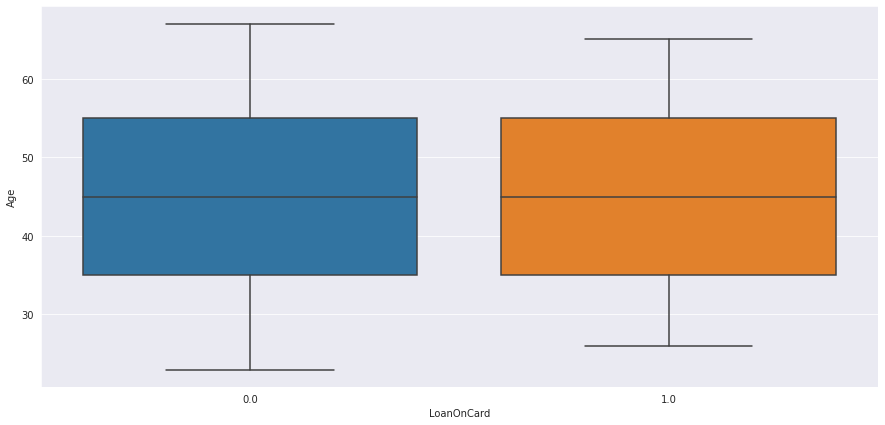

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df)
plt.show()

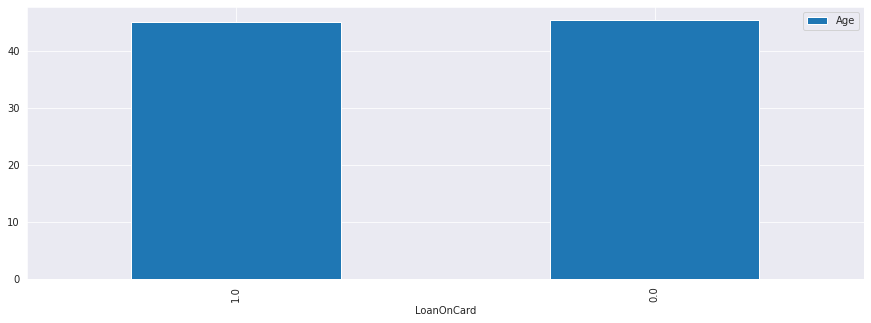

In [51]:
df.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

**Categorical Variables**

**Level Vs LoanonCard**

<AxesSubplot:xlabel='Level', ylabel='count'>

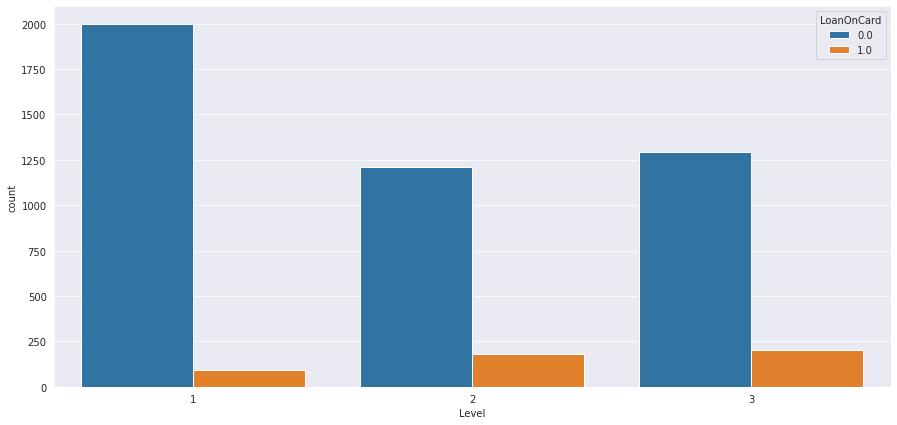

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(df['Level'],hue=df['LoanOnCard'])

**Conclusions:**


*   Level 1 has minimum number of loan holders and equal for 2 and 3.



**Hidden Score vs Loan on card**

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

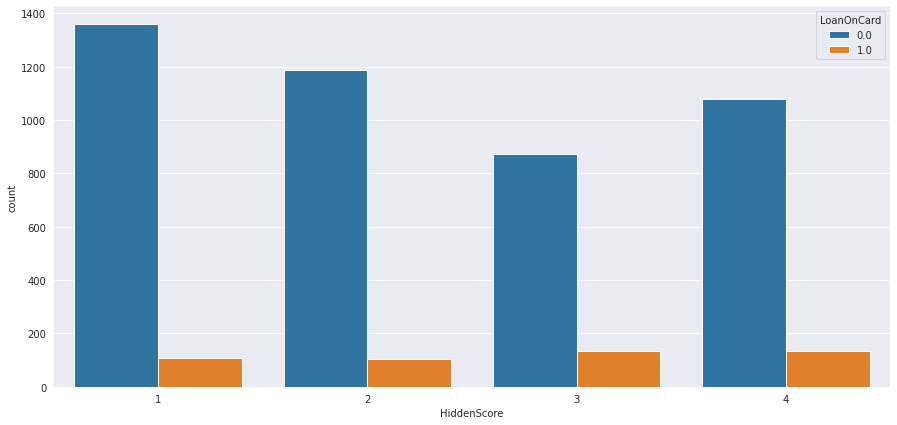

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'])

> **Conclusions**

*   Hidden score is more for non-loan holders



**Security vs Loan on card**

<AxesSubplot:xlabel='Security', ylabel='count'>

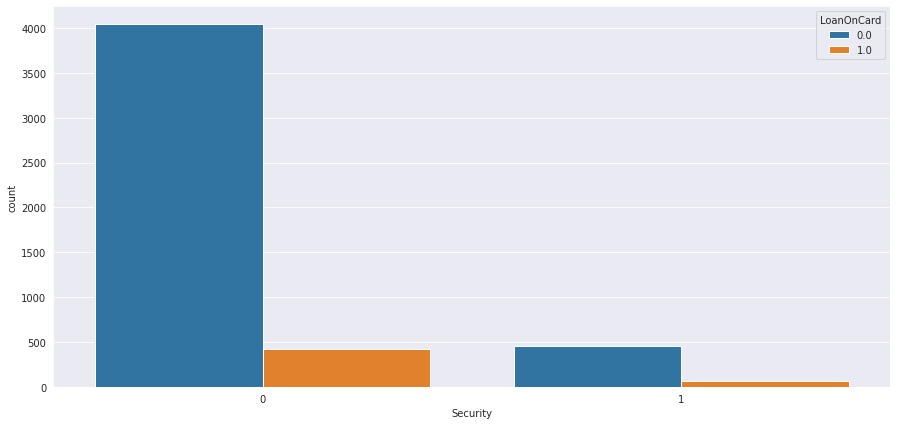

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(df['Security'],hue=df['LoanOnCard'])

**FixedDepositAccount vs  Loanoncard**

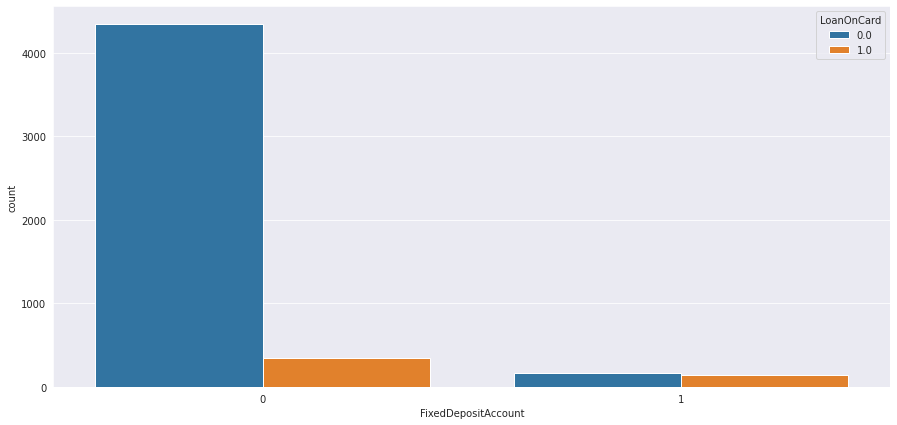

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(df['FixedDepositAccount'],hue=df['LoanOnCard'])
plt.show()

# **MultiVariate Analysis**

**"Monthly average spend" vs "loan" vs "level"**

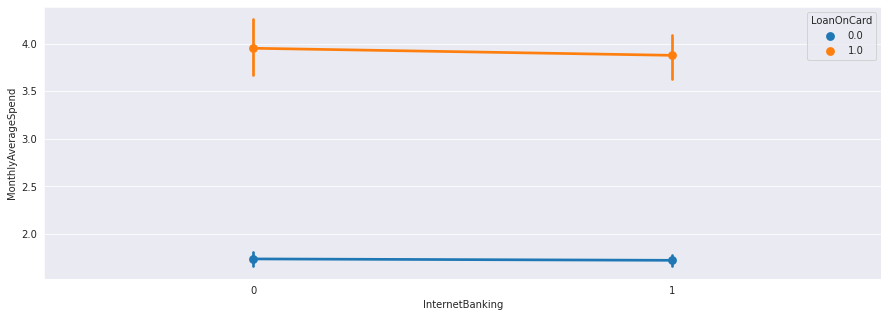

In [56]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

**"Monthly average spend" vs "loan" vs "level"**

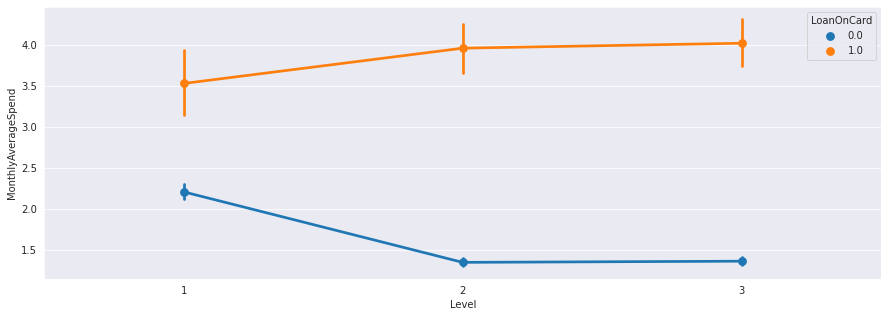

In [57]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

**"MonthlyAverageSpend" vs "Loan" vs "InternetBanking"**

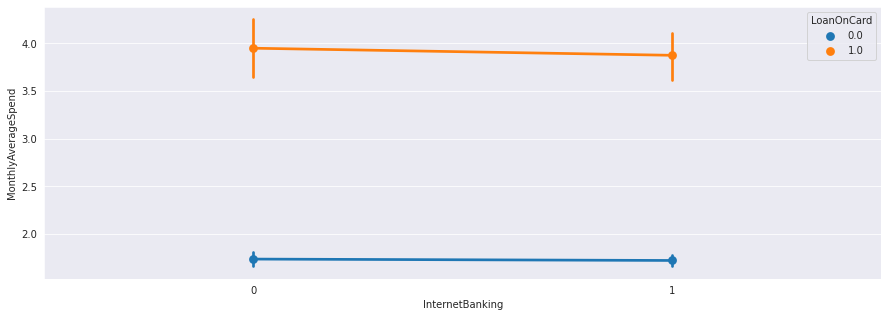

In [58]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

**"MonthlyAverageSpend" vs "Loan" vs "CreditCard"**

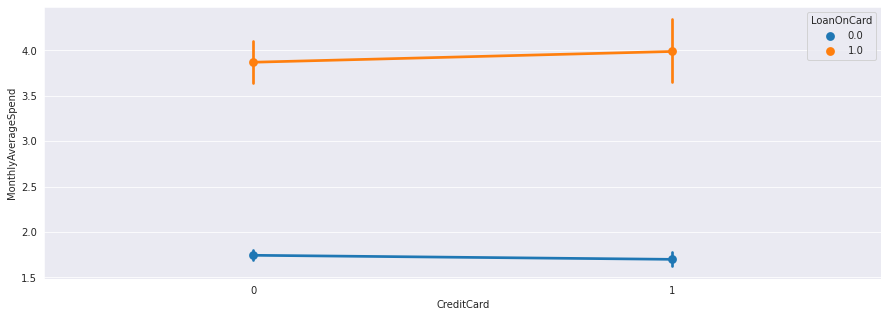

In [59]:
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

**"MonthlyAverageSpend" vs "Loan" vs "FixedDepositAccount"**

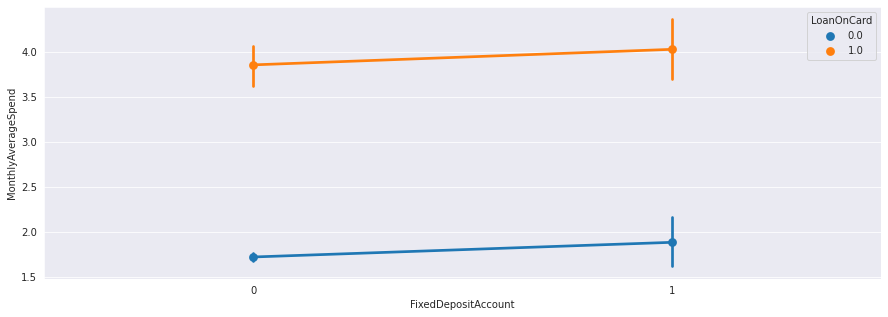

In [60]:
plt.figure(figsize=(15,5))
sns.pointplot(x="FixedDepositAccount", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

**Conclusions:**

*  Spend is slightly more for FD Account holders.

*  Spend is slightly more for credit card holders

*  Loan holder spend more money. Particulary the spendings are more on level 2 and 3

*   Security of loan holders is very less.

# Hypothesis Testing

In [61]:
summary_df =df.groupby('LoanOnCard')
summary_df.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


** Conclusions **

*   Mean of age is equal for both the classes
*   HighestSpend mean values differ a lot for loan and non-loan customer.


**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [62]:
#Two-sample unpaired t-test
# Numerical Columns
col=list(df.select_dtypes(include=['int64','float64']).columns)

ttest_df = pd.DataFrame()
ttest_df['Column'] = col
p_values = []
results = []

for i in col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    p_values.append(p_value)
    if p_value < 0.05:  # Setting our significance level at 5%
        results.append('f{} Rejecting Null Hypothesis. {}  of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        results.append('f{} Fail to Reject Null Hypothesis. {} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))

ttest_df['P_values'] = p_values
ttest_df['Results'] = results

ttest_df

,Column,P_values,Results
0,Age,5.694160e-01,f[1m Fail to Reject Null Hypothesis. Age of L...
1,CustomerSince,5.855243e-01,f[1m Fail to Reject Null Hypothesis. Customer...
2,HighestSpend,1.527530e-227,f[1m Rejecting Null Hypothesis. HighestSpend ...
3,ZipCode,9.920253e-01,f[1m Fail to Reject Null Hypothesis. ZipCode ...
4,MonthlyAverageSpend,2.414410e-77,f[1m Rejecting Null Hypothesis. MonthlyAverag...
5,Mortgage,1.338960e-10,f[1m Rejecting Null Hypothesis. Mortgage of ...


In [63]:
# Age, CustomerSince and ZipCode do not have effect on target variable.
# Dropping these column before building model
df.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

**Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)**

**H1: There is significant difference in hidden score for different category of target variable(Loan on card)**    

In [64]:
# Categorical Variables
lc_hs=pd.crosstab(df['LoanOnCard'],df['HiddenScore'])
print(lc_hs)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134


In [65]:
chi, p_value, dof, expected = stats.chi2_contingency(lc_hs)
print('P_Value:', p_value)

if p_value < 0.05: 
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of LoanOnCard)')
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of LoanOnCard)')

P_Value: 1.5107064617649127e-06
{} Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of LoanOnCard)


In [66]:
# Categorical Columns
cat_col=list(df.select_dtypes(include=['category']).columns)

# Removing HiddenScore and LoanOnCard column
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')

ttest_df_cat = pd.DataFrame()
ttest_df_cat['Column'] = cat_col
p_values = []
results = []

for i in cat_col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    p_values.append(p_value)
    if p_value < 0.05:  # Setting our significance level at 5%
        results.append('f{} Rejecting Null Hypothesis. {}  of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        results.append('f{} Fail to Reject Null Hypothesis. {} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))

ttest_df_cat['P_values'] = p_values
ttest_df_cat['Results'] = results

ttest_df_cat

,Column,P_values,Results
0,Level,1.916153e-24,f[1m Rejecting Null Hypothesis. Level of Loa...
1,Security,1.492227e-01,f[1m Fail to Reject Null Hypothesis. Security...
2,FixedDepositAccount,3.934087e-30,f[1m Rejecting Null Hypothesis. FixedDepositA...
3,InternetBanking,6.696352e-01,f[1m Fail to Reject Null Hypothesis. Internet...
4,CreditCard,8.585873e-01,f[1m Fail to Reject Null Hypothesis. CreditCa...


In [67]:
# We can see CreditCard, InternetBanking and Security does not have significant difference in target variable.
# So dropping these columns before building model
df.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

# 4. Data Pre-processing

# **Outlier Analysis and Target Imbalance**

In [68]:
# Outlier Analysis
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

for c in col:
    #getting upper lower quartile values
    print('Column: {}'.format(c))
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('Total Number of outliers in {} Before Imputing : {}'.format(c,len(Outliers)))

    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('Mean of {} is {}'.format(c,mean))

    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(c,len(Outliers)))  
    print('\n')

Column: HighestSpend
Total Number of outliers in HighestSpend Before Imputing : 96
Mean of HighestSpend is 71
Total Number of outliers in HighestSpend After Imputing : 0


Column: MonthlyAverageSpend
Total Number of outliers in MonthlyAverageSpend Before Imputing : 324
Mean of MonthlyAverageSpend is 1
Total Number of outliers in MonthlyAverageSpend After Imputing : 0


Column: Mortgage
Total Number of outliers in Mortgage Before Imputing : 291
Mean of Mortgage is 38
Total Number of outliers in Mortgage After Imputing : 0




# **Checking on Target Imbalance**

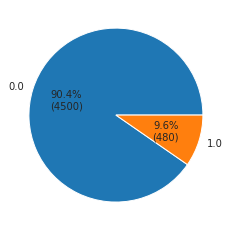

In [69]:
s = df['LoanOnCard'].value_counts()
fig = plt.pie(s,labels = s.index, autopct=autopct_format(s))

**Conclusions**
*   Imbalance in target variable is observed.
*   It is necessary to treat imbalanced data to prevent high bias and low accuracy in our classifier model.
*   We will thus use SMOTE (oversampling) so that important information from the dataset is not lost.




In [70]:
# Splitting data into independent variables and dependent variables(target variable)
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard']

In [71]:
# Splitting X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning:

# **Logistic Regression Model**

In [72]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

print('Accuracy on Training data:',logistic_model.score(X_train, y_train) )
print('Accuracy on Test data:',logistic_model.score(X_test, y_test) )

Accuracy on Training data: 0.9506597819850832
Accuracy on Test data: 0.9424364123159303


**Conclusions:**

*   94% accuracy on training data
*   93% accuracy on test set


**Confusion Matrix**

In [73]:
confusion_mat = confusion_matrix(y_test, logistic_pred, labels=[0, 1])
confusion_mat

array([[1320,   27],
       [  59,   88]])

In [74]:
print("classification  Matrix:\n",classification_report(y_test,logistic_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1347
         1.0       0.77      0.60      0.67       147

    accuracy                           0.94      1494
   macro avg       0.86      0.79      0.82      1494
weighted avg       0.94      0.94      0.94      1494



**Conclusions:** 

*   The model is poor at predicting class 1 compared to class 0.
*   Recall tells that only 48% class 1 is predicted correctly from actual values as we dont have enough data of class 1 to train the model
*   We will do the sampling and check how recall values improves in this case.


# **SMOTE**

In [75]:
smote_model = SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_model.fit_resample(X,y)

In [76]:
count_df = pd.DataFrame()
count_df['Before SMOTE'] = y.value_counts()
count_df['After SMOTE'] = y_s.value_counts()
count_df


,Before SMOTE,After SMOTE
0.0,4500,4500
1.0,480,4500


**Conclusion**
Target is balanced after SMOTE (sampling)

In [77]:
# Splitting X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=10)

In [78]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

print('Accuracy on Training data:',logistic_model.score(X_train, y_train) )
print('Accuracy on Test data:',logistic_model.score(X_test, y_test) )

Accuracy on Training data: 0.8749206349206349
Accuracy on Test data: 0.8818518518518519


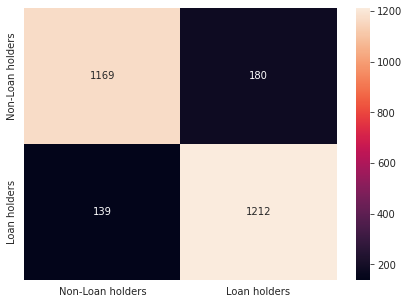

In [79]:
cm = confusion_matrix(y_test, logistic_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [80]:
# Classification  Matrix
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1349
         1.0       0.87      0.90      0.88      1351

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



**Smote for training data**

In [81]:
# Splitting X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [82]:
# Creating SMOTE model
smote_model=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_model.fit_resample(X_train, y_train)

In [83]:
# Creating logistic model
logistic_model = LogisticRegression()
logistic_model.fit(x_train_res, y_train_res)
logistic_pred = logistic_model.predict(X_test)

print('Accuracy on Training data:',logistic_model.score(X_train, y_train) )
print('Accuracy on Test data:',logistic_model.score(X_test, y_test) )

Accuracy on Training data: 0.8763625932300632
Accuracy on Test data: 0.8641231593038822


**Conclusion:**

*  Accuracy has decreased



In [84]:
confusion_mat = confusion_matrix(y_test, logistic_pred, labels=[0, 1])
confusion_mat

array([[1157,  190],
       [  13,  134]])

In [85]:
# Classification  Matrix:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1347
         1.0       0.41      0.91      0.57       147

    accuracy                           0.86      1494
   macro avg       0.70      0.89      0.74      1494
weighted avg       0.93      0.86      0.88      1494



**Conclusions:**

*   We are getting good recall value but the precision value is reduced after SMOTE.

# **Naive Bayes Model**

In [86]:
# Naive Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_res, y_train_res.ravel())
naive_bayes_pred = naive_bayes_model.predict(X_test)

print('Accuracy on Training data:',naive_bayes_model.score(X_train, y_train) )
print('Accuracy on Test data:',naive_bayes_model.score(X_test, y_test) )

Accuracy on Training data: 0.8818129661503156
Accuracy on Test data: 0.8627844712182061


In [87]:
confusion_mat = confusion_matrix(y_test, naive_bayes_pred, labels=[0, 1])
confusion_mat

array([[1165,  182],
       [  23,  124]])

In [88]:
# Classification  Matrix
print(classification_report(y_test,naive_bayes_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1347
         1.0       0.41      0.84      0.55       147

    accuracy                           0.86      1494
   macro avg       0.69      0.85      0.73      1494
weighted avg       0.92      0.86      0.88      1494



**Conclusions:**

*   Recall value for class 1 is less in naive bayes model compared to logistic regression.
*   Recall value is good for both the classes unlike before.


**K-Fold CV for finding best model**

In [89]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
NB_model=GaussianNB()

In [90]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', NB_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	accuracy = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(accuracy)

LR: 0.946787 (0.007254)
KNN: 0.924900 (0.007082)
NB: 0.907430 (0.013750)


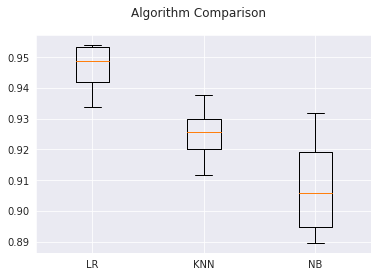

In [91]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusions:** 

*   There's good accuracy even without sampling.
*   Performance of Naive bayes is less compared to Logistic



In [92]:
#seed = 7
# stratified k-fold to check the performance due to imbalance data
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', NB_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	accuracy = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(accuracy)

LR: 0.945582 (0.004255)
KNN: 0.924900 (0.005694)
NB: 0.908233 (0.015162)


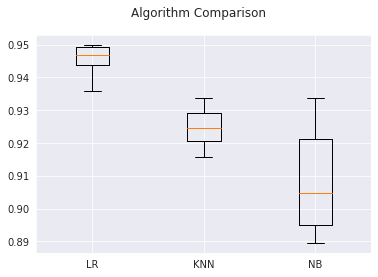

In [93]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusion:**

Slight increase in accuracy from before

# **6.Conclusion  and improvisation.**

> 

*   Selected final model: Logistic Regression
> It performs well in training and testing test.
*   Logistic regression performed well in k-fold cross validation as well.
*   Less deviation in Logistic Regression
*   Logistic Regression is not affected by overfitting and it is also has good recall value.


*  Prediction on minority classes improved because of Sampling.
> Thus data should be equally collected for both classes.

> **Few customers does't have credit card but those customer having loan on card. This data error can be avoided**
